[View in Colaboratory](https://colab.research.google.com/github/UnoYiyi/BAX423/blob/master/443_Homework_2.ipynb)

## Part A: Portfolio Optimization based on the Full Data Set

### 1. Prepare the dataset

#### A. Based on the dataset, compute the rate of returns for each stock, i.e.,

$$r_{it} = \frac{I_{i,t} - I_{i,t-1}}{I_{i,t-1}}$$

where $I_{i,t}$ is the raw data from stock i at time t.


In [69]:
!pip install cvxpy==0.4.11

In [0]:
# import library
import numpy as np
import math
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy

In [71]:
!pip install xlrd

In [72]:
# import dataset
from google.colab import files
files.upload()
df = pd.read_excel("./datahomework2.xls")
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999


In [73]:
# calculate the rate of returns for each stock
rr =  df.pct_change()
rr.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.028097,0.000094,-0.012827,-0.013473,-0.024832,0.024739
2,0.033924,0.014022,-0.001727,0.000000,-0.002764,0.048552
3,0.008723,0.038422,0.027037,0.026592,0.003365,0.027628
4,-0.010667,0.001073,-0.013828,-0.005565,-0.012231,-0.019915





#### B. Based on the data set, compute the average returns that will be used for the optimization, i.e.,

$$\mu_{i} = \displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T} - 1 $$
Hint: the term $\displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T}$ is a geometric mean

In [74]:
# remove the NAN value and add 1 to all values 
rr1 = rr[1:] # rr1 is average returns without NANs
rr2 = rr1 + 1 #rr2 is average returns +1
rr2.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
1,0.971903,1.000094,0.987173,0.986527,0.975168,1.024739
2,1.033924,1.014022,0.998273,1.000000,0.997236,1.048552
3,1.008723,1.038422,1.027037,1.026592,1.003365,1.027628
4,0.989333,1.001073,0.986172,0.994435,0.987769,0.980085
5,0.971540,0.975359,0.992274,0.986879,0.992810,1.007112


In [75]:
# calculate the average returns using gmean
mu = scipy.stats.gmean(rr2) -1
mu

array([ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05])

In [206]:
var = rr2.var(axis = 0)
var = np.array(var)
var

array([0.0004072 , 0.0002108 , 0.00029204, 0.00024236, 0.00020284,
       0.00107123])

#### C. Based on the data set, compute the variance-covariance matrix of the stock returns, i.e.,

$$CoVar(r_{i},r_{j}) = \frac{1}{T}\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})-1$$

Hint: the term $\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})$ is a geometric mean

In [76]:
# calculate the variance-covariance matrix of the stock returns
Cov = np.cov(rr1, rowvar =False) 
Cov
## If rowvar is True (default), then each row represents a variable, 
## with observations in the columns. Otherwise, the relationship is 
## transposed: each column represents a variable, while the rows 
## contain observations. 

array([[ 4.07197383e-04,  4.60871516e-06,  1.22772826e-05,
        -1.05667569e-05,  6.56723220e-06, -9.50143600e-05],
       [ 4.60871516e-06,  2.10803738e-04,  5.99369392e-05,
         6.94486102e-05,  6.00972703e-05,  4.03675884e-05],
       [ 1.22772826e-05,  5.99369392e-05,  2.92036867e-04,
         2.71083410e-05,  5.45848998e-05,  2.43589545e-05],
       [-1.05667569e-05,  6.94486102e-05,  2.71083410e-05,
         2.42364043e-04,  9.89613223e-05,  2.19275123e-05],
       [ 6.56723220e-06,  6.00972703e-05,  5.45848998e-05,
         9.89613223e-05,  2.02842223e-04,  9.65658924e-06],
       [-9.50143600e-05,  4.03675884e-05,  2.43589545e-05,
         2.19275123e-05,  9.65658924e-06,  1.07122641e-03]])

#### D. Provide the vector $\mu$ and the variance-covariance matrix $\Sigma$ for the 6 assets considered

In [77]:
# the vector mu 
mu

array([ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05])

In [0]:
mu_matrix = matrix(mu)

In [79]:
# the variance-covariance matrix Sigma
Cov

array([[ 4.07197383e-04,  4.60871516e-06,  1.22772826e-05,
        -1.05667569e-05,  6.56723220e-06, -9.50143600e-05],
       [ 4.60871516e-06,  2.10803738e-04,  5.99369392e-05,
         6.94486102e-05,  6.00972703e-05,  4.03675884e-05],
       [ 1.22772826e-05,  5.99369392e-05,  2.92036867e-04,
         2.71083410e-05,  5.45848998e-05,  2.43589545e-05],
       [-1.05667569e-05,  6.94486102e-05,  2.71083410e-05,
         2.42364043e-04,  9.89613223e-05,  2.19275123e-05],
       [ 6.56723220e-06,  6.00972703e-05,  5.45848998e-05,
         9.89613223e-05,  2.02842223e-04,  9.65658924e-06],
       [-9.50143600e-05,  4.03675884e-05,  2.43589545e-05,
         2.19275123e-05,  9.65658924e-06,  1.07122641e-03]])

### 2. Portfolio Optimization: Minimizing Risk

What is the allocation x = {x1,x2,x3,x4,x5,x6} that solve the following problem

$$Minimize\frac{1}{2}x^{T}\sum x$$

Subject to

$$\mu^{T}x \geq R \\
\displaystyle \sum_{i=1}^{6} x_{i} = 1 \\
x \geq 0$$

where R is the annual return that the investor wants to achieve, with R = 0.07

In [119]:
R=0.07/252 ##there are 252 trading days in a year

x=cvx.Variable(6)

# Solution
# prob = cvs.Problem(objective, C)
# result = prob.solve()
# Prob 1
risk=0.5 * quad_form(x, Cov)
rr=sum_entries(mu*x)
prob1 = Problem(Minimize(risk ), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)
x_min = [y[0] for y in x.value.round(3)]

[[0.2042415 ]
 [0.19551309]
 [0.16170077]
 [0.17376282]
 [0.18986907]
 [0.07491276]]


### 3. Portfolio Optimization: Maximizing Returns (or Utility)

Another approach to portfolio optimization is to optimize the expected returns that the portfolio would give while penalizing for volatility (variance). Specifically, what is the allocation 𝑥 = {𝑥1, 𝑥2, 𝑥3, 𝑥4, 𝑥5, 𝑥6} that solve the following optimization problem

$$ Maximize\mu^{T}x - \gamma \sqrt{(x^{T}\Sigma x)}$$

Subject to 
$$\sum_{i=1}^{6}x_{i} = 1 \\
x \geq 0$$

where $\gamma$ is the risk aversion coefficient of the investor. Report the optimal allocations for $\gamma$ = 0.1, $\gamma$ = 0.15, $\gamma$ = 0.2, as well as the value of the objective function 

#### 3.1 gamma = 0.1

In [0]:
import numpy as np
from scipy.optimize import minimize

In [0]:
##define constraint
## first step - define bounds
bounds = ([0,None],[0,None],[0,None],[0,None],[0,None],[0,None])

In [0]:
## second step - the equality constraint
def con(x):
    return x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1
cons = {'type':'eq',
        'fun':con}

In [0]:
gamma1 = 0.1
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma1*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [85]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)
x0.shape

[[0 0 0 0 0 0]]


(1, 6)

In [86]:
mu_matrix.T.shape

(6, 1)

In [0]:
res1 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [133]:
res1.x

array([0.2967567 , 0.15516683, 0.16262145, 0.19664587, 0.18880915,
       0.        ])

In [217]:
res1.fun

-0.0002609951802955157

#### 3.2 gamma = 0.15

In [0]:
gamma2 = 0.15
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma2*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [90]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res2 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [92]:
res2.x

array([0.28012906, 0.16293947, 0.16697493, 0.19504473, 0.18995347,
       0.00495833])

In [218]:
res2.fun

0.00021910310153414655

#### 3.3 gamma = 0.2

In [0]:
gamma3 = 0.2
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma3* np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [94]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res3 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [96]:
res3.x

array([0.25906249, 0.16776416, 0.16932891, 0.19124837, 0.18827692,
       0.02431914])

In [214]:
result = pd.DataFrame(list(zip(x_min,res1.x,res2.x,res3.x)),
                     columns = ['Minimize_Risk','Maximize_Return(gamma = 0.1)','Maximize_Return(gamma = 0.15)','Maximize_Return(gamma = 0.2)'],
                     index = ['Amazon','Apple','Ebay','Facebook','Google','Twitter'])
result = result.round(3)
result

,Minimize_Risk,Maximize_Return(gamma = 0.1),Maximize_Return(gamma = 0.15),Maximize_Return(gamma = 0.2)
Amazon,0.204,0.297,0.280,0.259
Apple,0.196,0.155,0.163,0.168
Ebay,0.162,0.163,0.167,0.169
Facebook,0.174,0.197,0.195,0.191
Google,0.190,0.189,0.190,0.188
Twitter,0.075,0.000,0.005,0.024


### 4. Simulation

Based on the optimal allocations $𝑥^∗$ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000.
- Report the mean and the variance of the portfolio in a table
- Provide visualizations of your results. 

#### 4.1 Minimizing Risk Simulation

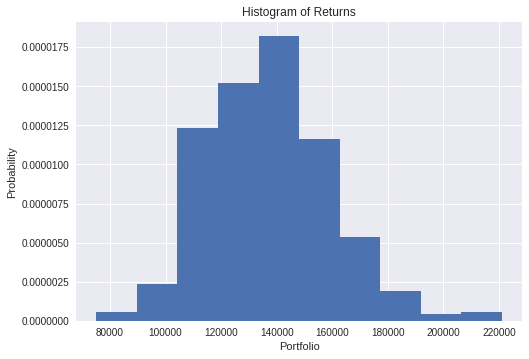

In [171]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)
plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
min_mean = np.mean(z_values)
min_var = np.var(z_values)

#### 4.2.1 Maximizing Return (Utility) - gamma = 0.10

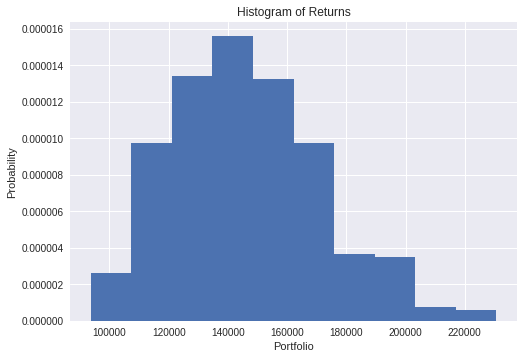

In [173]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res1.x.item(0),res1.x.item(1),res1.x.item(2),res1.x.item(3),res1.x.item(4),res1.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
max_mean1 = np.mean(z_values)
max_var1 = np.var(z_values)

#### 4.2.2 Maximizing Return (Utility) - gamma = 0.15

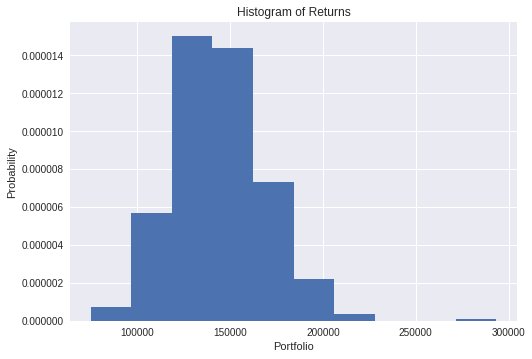

In [175]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 6 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res2.x.item(0),res2.x.item(1),res2.x.item(2),res2.x.item(3),res2.x.item(4),res2.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
max_mean2 = (np.mean(z_values))
max_var2 = (np.var(z_values))

#### 4.2.3 Maximizing Return (Utility) - gamma = 0.20

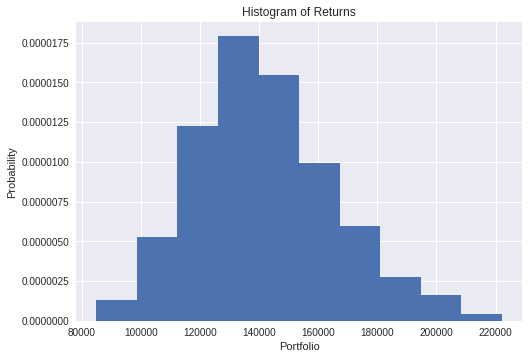

In [177]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 6 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res3.x.item(0),res3.x.item(1),res3.x.item(2),res3.x.item(3),res3.x.item(4),res3.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
max_mean3 = (np.mean(z_values))
max_var3 = (np.var(z_values))

#### 4.3. Reporting Result


In [187]:
simulation_mean = np.array([min_mean,max_mean1,max_mean2,max_mean3])
simulation_mean = simulation_mean.round(3)

array([137628.886, 146226.069, 144141.45 , 142008.644])

In [0]:
simulation_var = np.array([min_var,max_var1,max_var2,max_var3])
simulation_var = simulation_var.round(3)

In [215]:
result.loc['potfolio_mean'] = simulation_mean
result.loc['potfolio_variance'] =simulation_var
result = result.T
result

,Amazon,Apple,Ebay,Facebook,Google,Twitter,potfolio_mean,potfolio_variance
Minimize_Risk,0.204,0.196,0.162,0.174,0.190,0.075,137628.886215,4.879576e+08
Maximize_Return(gamma = 0.1),0.297,0.155,0.163,0.197,0.189,0.000,146226.069108,6.250434e+08
Maximize_Return(gamma = 0.15),0.280,0.163,0.167,0.195,0.190,0.005,144141.449910,5.976632e+08
Maximize_Return(gamma = 0.2),0.259,0.168,0.169,0.191,0.188,0.024,142008.643637,5.587610e+08


In [222]:
mu

array([ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05])

In [223]:
var

array([0.0004072 , 0.0002108 , 0.00029204, 0.00024236, 0.00020284,
       0.00107123])

### 5. Recommendations
- a. Explain the different allocations, i.e., why they are different.
- b. What should an investor with risk aversion $\gamma$ = 0.1 do? What about investors with
$\gamma$ = 0.15 and $\gamma$ = 0.2?

a.  With mu  = [ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05] and var = [0.0004072 , 0.0002108 , 0.00029204, 0.00024236, 0.00020284,
       0.00107123], it means: 
        
        For average return: Amazon>Facebook>Google>Ebay>Apple>Twitter
       
       For variance: Twitter>Amazon>Ebay>Facebook>Apple>Google
       
       
       Amazon has highest average return rate and Twitter has lowest return; Twitter is most volatile and Google is the most stable
       
   

There are four different kind of investors - Minimize_Risk, Maximize_Return(gamma = 0.1), Maximize_Return(gamma = 0.15) and Maximize_Return(gamma =0.20). 

**Minimize_risk type of investor**: 

- The theory is that they want to avoid risk as much as possible, and it could possible lead to low return as well.The portfolio proves the theory with the lowest return and the lowest variance.
- Since Twitter has the highest variance and lowest return, they definitely want to avoid Twitter, and Twitter is only  7.5%. of the portfolio.    
- Even though Amazon(20.4%) has high variance, the stock has the highest return rate, doubling the the second highest stock. The extremely high return rate balanced out the variance part.
- We can see that the portfolio also consists of 19.5% of Apple,  19% of Google, 17.4% on Facebook and they are all low variance stocks, with Facebook>Apple>Google on variance.

**Maximize_return type of investor**
- Since gamma is the risk aversion parameter, which means that the higher the risk averse (the gamma value), the more likely the investor would be willing to accept lower return portfolio as long as the portfolio has lower variance. 
- It is true with our case: When we increase gamma, the portfolio return gets lower and the portfolio variance gets lower as well.
- For the stock allocation, the higher the risk aversion factor, the lower portion we invest in Amazon. 

b. 
**Investor with risk aversion $\gamma = 0.1$**:
- He or she is the least risk averse and should choose stock with high risk and high return, which means they should invest in more Amazon, Facebook and Google, which are the top three return stocks.

**Investor with risk aversion $\gamma = 0.15$**:
- He or she is the medium risk averse type and should choose stock with medium risk even when chasing for high return, which means that they should convert some of their high risk high return stocks to lower risk and slightly lower return stocks, which means that he or she should reduce the positions in Aamzon.

**Investor with risk aversion $\gamma = 0.20$**:
- He or she is the most risk averse type and should choose stock with low risk even when chasing for high return, which means that they should convert more of their high risk high return stocks to lower risk and lower return stocks. For example, they should reducde their positions in Amazon and increase their positions in Apple(low variance)

## Part B: Portfolio Optimization based on the last 400 trading days

Redo Part A taking into account the last 400 trading days only.

In [263]:
df_2 = df.iloc[-400:]
df_2.shape

(400, 6)

### 1. Prepare the dataset

#### A. Based on the dataset, compute the rate of returns for each stock, i.e.,

$$r_{it} = \frac{I_{i,t} - I_{i,t-1}}{I_{i,t-1}}$$

where $I_{i,t}$ is the raw data from stock i at time t.


In [264]:
# calculate the rate of returns for each stock
rr_2 =  df_2.pct_change()
rr_2.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
399,NaN,NaN,NaN,NaN,NaN,NaN
400,-0.015032,0.015207,0.010625,0.006353,0.012142,0.067554
401,-0.002854,0.008281,-0.007646,0.000879,-0.002107,-0.022052
402,0.015332,0.004060,-0.001284,-0.001597,0.002794,-0.011274
403,0.008462,-0.007444,0.000321,-0.001439,0.001251,-0.058007





#### B. Based on the data set, compute the average returns that will be used for the optimization, i.e.,

$$\mu_{i} = \displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T} - 1 $$
Hint: the term $\displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T}$ is a geometric mean

In [265]:
# remove the NAN value and add 1 to all values 
rr1_2 = rr_2[1:] # rr1 is average returns without NANs
rr2_2 = rr1_2 + 1 #rr2 is average returns +1
rr2_2.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
400,0.984968,1.015207,1.010625,1.006353,1.012142,1.067554
401,0.997146,1.008281,0.992354,1.000879,0.997893,0.977948
402,1.015332,1.004060,0.998716,0.998403,1.002794,0.988726
403,1.008462,0.992556,1.000321,0.998561,1.001251,0.941993
404,0.999318,0.999352,1.002571,1.000160,0.999641,0.998947


In [266]:
# calculate the average returns using gmean
mu_2 = scipy.stats.gmean(rr2_2) -1
mu_2

array([0.0014643 , 0.00126081, 0.00080563, 0.00098042, 0.0008732 ,
       0.00150318])

In [267]:
var = rr2_2.var(axis = 0)
var = np.array(var)
var

array([0.00023009, 0.00013972, 0.00023675, 0.00015857, 0.00012249,
       0.00100392])

#### C. Based on the data set, compute the variance-covariance matrix of the stock returns, i.e.,

$$CoVar(r_{i},r_{j}) = \frac{1}{T}\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})-1$$

Hint: the term $\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})$ is a geometric mean

In [228]:
# calculate the variance-covariance matrix of the stock returns
Cov_2 = np.cov(rr1_2, rowvar =False) 
Cov_2
## If rowvar is True (default), then each row represents a variable, 
## with observations in the columns. Otherwise, the relationship is 
## transposed: each column represents a variable, while the rows 
## contain observations. 

array([[ 2.30088874e-04, -9.80656083e-06, -3.67118033e-07,
        -2.03091049e-06, -9.31662594e-07, -3.37324041e-05],
       [-9.80656083e-06,  1.39717164e-04,  6.59845214e-06,
         2.84381359e-06,  6.91391549e-06, -1.06771505e-05],
       [-3.67118033e-07,  6.59845214e-06,  2.36747967e-04,
        -1.32110055e-05,  1.87955968e-06, -2.61970380e-05],
       [-2.03091049e-06,  2.84381359e-06, -1.32110055e-05,
         1.58565058e-04,  2.13809934e-05, -2.33631945e-06],
       [-9.31662594e-07,  6.91391549e-06,  1.87955968e-06,
         2.13809934e-05,  1.22494482e-04, -5.32303550e-06],
       [-3.37324041e-05, -1.06771505e-05, -2.61970380e-05,
        -2.33631945e-06, -5.32303550e-06,  1.00392215e-03]])

#### D. Provide the vector $\mu$ and the variance-covariance matrix $\Sigma$ for the 6 assets considered

In [229]:
# the vector mu 
mu_2

array([0.0014643 , 0.00126081, 0.00080563, 0.00098042, 0.0008732 ,
       0.00150318])

In [0]:
mu_matrix = matrix(mu_2)

In [0]:
# the variance-covariance matrix Sigma
Cov = Cov_2

### 2. Portfolio Optimization: Minimizing Risk

What is the allocation x = {x1,x2,x3,x4,x5,x6} that solve the following problem

$$Minimize\frac{1}{2}x^{T}\sum x$$

Subject to

$$\mu^{T}x \geq R \\
\displaystyle \sum_{i=1}^{6} x_{i} = 1 \\
x \geq 0$$

where R is the annual return that the investor wants to achieve, with R = 0.07

In [248]:
R=0.07/252 ##there are 252 trading days in a year

x=cvx.Variable(6)

# Solution
# prob = cvs.Problem(objective, C)
# result = prob.solve()
# Prob 1
risk=0.5 *quad_form(x, Cov_2)
rr=sum_entries(mu_2*x)
prob1 = Problem(Minimize(risk), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)
x_min = [y[0] for y in x.value.round(3)]

[[0.16299763]
 [0.22953546]
 [0.14733569]
 [0.18900744]
 [0.22479685]
 [0.04632693]]


### 3. Portfolio Optimization: Maximizing Returns (or Utility)

Another approach to portfolio optimization is to optimize the expected returns that the portfolio would give while penalizing for volatility (variance). Specifically, what is the allocation 𝑥 = {𝑥1, 𝑥2, 𝑥3, 𝑥4, 𝑥5, 𝑥6} that solve the following optimization problem

$$ Maximize\mu^{T}x - \gamma \sqrt{(x^{T}\Sigma x)}$$

Subject to 
$$\sum_{i=1}^{6}x_{i} = 1 \\
x \geq 0$$

where $\gamma$ is the risk aversion coefficient of the investor. Report the optimal allocations for $\gamma$ = 0.1, $\gamma$ = 0.15, $\gamma$ = 0.2, as well as the value of the objective function 

#### 3.1 gamma = 0.1

In [0]:
import numpy as np
from scipy.optimize import minimize

In [0]:
gamma1 = 0.1
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma1*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [235]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)
x0.shape

[[0 0 0 0 0 0]]


(1, 6)

In [236]:
mu_matrix.T.shape

(6, 1)

In [0]:
res1 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [238]:
res1.x

array([0.21998636, 0.21232513, 0.15322577, 0.17908012, 0.17333022,
       0.06205241])

#### 3.2 gamma = 0.15

In [0]:
gamma2 = 0.15
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma2*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [240]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res2 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [242]:
res2.x

array([0.20717139, 0.20630262, 0.16345486, 0.18306271, 0.18090267,
       0.05910575])

#### 3.3 gamma = 0.2

In [0]:
gamma3 = 0.2
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma3* np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [244]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res3 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [246]:
res3.x

array([0.20166682, 0.20413569, 0.16790651, 0.18510503, 0.184638  ,
       0.05654795])

In [260]:
result = pd.DataFrame(list(zip(x_min,res1.x,res2.x,res3.x)),
                     columns = ['Minimize_Risk','Maximize_Return(gamma = 0.1)','Maximize_Return(gamma = 0.15)','Maximize_Return(gamma = 0.2)'],
                     index = ['Amazon','Apple','Ebay','Facebook','Google','Twitter'])
result = result.round(3)
result

,Minimize_Risk,Maximize_Return(gamma = 0.1),Maximize_Return(gamma = 0.15),Maximize_Return(gamma = 0.2)
Amazon,0.163,0.220,0.207,0.202
Apple,0.230,0.212,0.206,0.204
Ebay,0.147,0.153,0.163,0.168
Facebook,0.189,0.179,0.183,0.185
Google,0.225,0.173,0.181,0.185
Twitter,0.046,0.062,0.059,0.057


### 4. Simulation

Based on the optimal allocations $𝑥^∗$ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000.
- Report the mean and the variance of the portfolio in a table
- Provide visualizations of your results. 

#### 4.1 Minimizing Risk Simulation

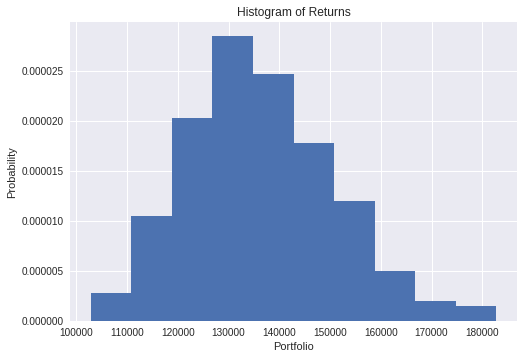

In [250]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
min_mean = np.mean(z_values)
min_var = np.var(z_values)

#### 4.2.1 Maximizing Return (Utility) - gamma = 0.10

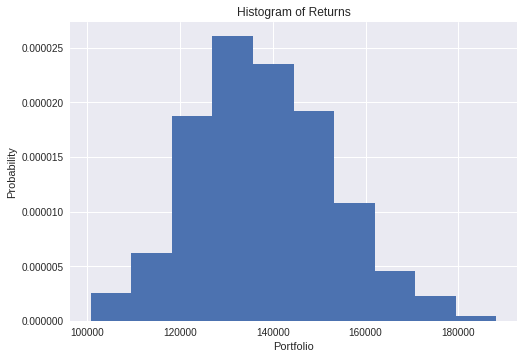

In [252]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res1.x.item(0),res1.x.item(1),res1.x.item(2),res1.x.item(3),res1.x.item(4),res1.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
max_mean1 = np.mean(z_values)
max_var1 = np.var(z_values)

#### 4.2.2 Maximizing Return (Utility) - gamma = 0.15

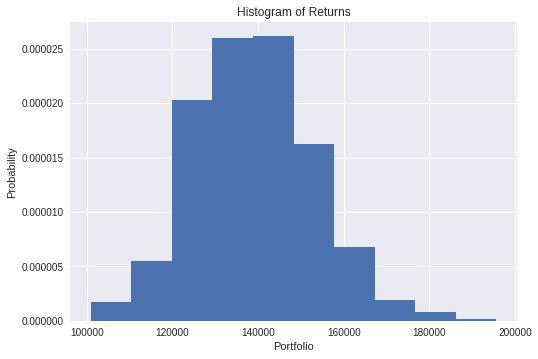

In [254]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res2.x.item(0),res2.x.item(1),res2.x.item(2),res2.x.item(3),res2.x.item(4),res2.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
max_mean2 = (np.mean(z_values))
max_var2 = (np.var(z_values))

#### 4.2.3 Maximizing Return (Utility) - gamma = 0.20

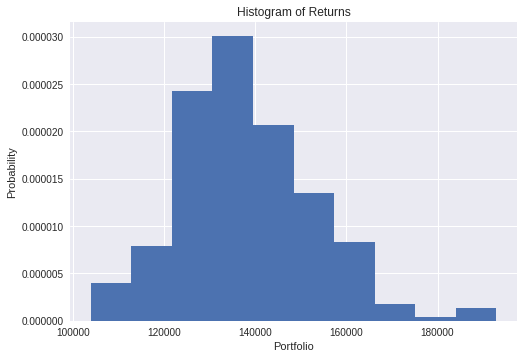

In [256]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=500 # I am doing 500 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res3.x.item(0),res3.x.item(1),res3.x.item(2),res3.x.item(3),res3.x.item(4),res3.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
max_mean3 = (np.mean(z_values))
max_var3 = (np.var(z_values))

#### 4.3. Reporting Result


In [0]:
simulation_mean = np.array([min_mean,max_mean1,max_mean2,max_mean3])
simulation_mean = simulation_mean.round(3)
simulation_var = np.array([min_var,max_var1,max_var2,max_var3])
simulation_var = simulation_var.round(3)

In [261]:
result.loc['potfolio_mean'] = simulation_mean
result.loc['potfolio_variance'] =simulation_var
result = result.T
result

,Amazon,Apple,Ebay,Facebook,Google,Twitter,potfolio_mean,potfolio_variance
Minimize_Risk,0.163,0.230,0.147,0.189,0.225,0.046,136310.967,2.086038e+08
Maximize_Return(gamma = 0.1),0.220,0.212,0.153,0.179,0.173,0.062,138080.961,2.247288e+08
Maximize_Return(gamma = 0.15),0.207,0.206,0.163,0.183,0.181,0.059,138935.756,1.944203e+08
Maximize_Return(gamma = 0.2),0.202,0.204,0.168,0.185,0.185,0.057,138090.925,2.129030e+08


### 5. Recommendations
- a. Explain the different allocations, i.e., why they are different.
- b. What should an investor with risk aversion $\gamma$ = 0.1 do? What about investors with
$\gamma$ = 0.15 and $\gamma$ = 0.2?
- c. Why are the allocations different?


a. With mu = [0.0014643 , 0.00126081, 0.00080563, 0.00098042, 0.0008732 , 0.00150318] and var = [0.00023009, 0.00013972, 0.00023675, 0.00015857, 0.00012249,
       0.00100392], it means:

**For average return: Twitter>Amazon>Apple>Facebook>Google>Ebay**


**For variance: Twitter>Ebay>Amazon>Facebook>Apple>Google**

- Twitter has highest average return rate (much higher than the rest) and Ebay has lowest return; Twitter is most volatile and Google is the most stable.

For Investors:

There are four different kind of investors - Minimize_Risk, Maximize_Return(gamma = 0.1), Maximize_Return(gamma = 0.15) and Maximize_Return(gamma =0.20).

**Minimize_risk type of investor:**

The theory is that they want to avoid risk as much as possible, and it could possible lead to low return as well.The portfolio proves the theory with the lowest return and the second-lowest variance. Since Twitter has the highest variance and highest return, they definitely want to avoid Twitter, and Twitter is only 4.6%. of the portfolio. Since Apple and Google being the lowest variance, the portfolio has the high position on both Apple(23%) and Google(22.5%)

**Maximize_return type of investor**

Since gamma is the risk aversion parameter, which means that the higher the risk averse (the gamma value), the more likely the investor would be willing to accept lower return portfolio as long as the portfolio has lower variance. However, in the case of this dataset, it is interesting that when gamma = 0.15(medium risk aversion), it has the highest return and lowest variance.  





b. 
**Investor with risk aversion γ=0.1 :**

He or she is the least risk averse and should choose stock with high risk and high return, which means they should invest in more Twitter, Amazon, Apple and Facebook, which are the top four return stocks. However, since the Twitter is extremely volatile, the portfolio recommends only take 6.2% of the Twitter stock since the Twitter stock's risk might outweigh the return.

**Investor with risk aversion γ=0.15 :**

He or she is the medium risk averse type and should choose stock with medium risk even when chasing for high return, which means that they should convert some of their high risk high return stocks to lower risk and slightly lower return stocks, which means that he or she should reduce the positions in Aamzon and Twitter.

**Investor with risk aversion γ=0.20 :**

He or she is the most risk averse type and should choose stock with low risk even when chasing for high return, which means that they should convert more of their high risk high return stocks to lower risk and lower return stocks. For example, they should reducde their positions in Amazon and Twitter and increase their positions in Google and Facebook(low variance)

c.
The change in allocation happend because the risk-aversion factor changes. The more risk-aversion, the more likely that the investor reduce positions of high risk stocks and increase positions of low variance stocks. Althought it might reduce the potential returns, the investors prefer safer choice.
